# Project 1: Data Project
**Name:** Jana Ucnova (pvw581) // Spring Semester 2020

# Do developed countries manage plastic waste better?
Mismanaged plastic waste is, by ``ourworldindata.org``, defined as "plastic that is either **littered** or **inadequately disposed**". Inadequately disposed waste is not formally managed and it includes disposal in dumps or uncontrolled landfills, where it cannot be fully contained. This waste then might eventually enter the oceans trough water streams, wastewater outflows, or it can be transported by wind.

GDP is one of the indicators of economic activity and it is considered as "world's most powerful statistical indicator of national development and progress". The main objective of this project is to show whether more developed countries can manage plastic waste better than developing countries. In other words, this project focuses on answering these questions:

- Does higher GDP lead to a lower amount of mismanaged plastic waste?
- If more people live in the coastal area, does this country produce a higher amount of mismanaged plastic waste?
- Which continent manages plastic waste the most inadequately?

Firstly, modules needed are imported. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import folium
import branca
import jinja2
import requests
%matplotlib inline

## Read and clean data

### Per capita mismanaged plastic waste vs GDP per capita
**Read data about per capita mismanaged plastic waste and GDP per capita** in ``per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv``. Data contains information about per capita mismanaged plastic waste (kilograms per person per day), GDP per capita (in $) and the total population of different countries within several decades. We **clear the data** by choosing information only from the year 2010, by removing rows (countries) that do not contain all information and by renaming columns.

In [2]:
# Load data set
percapita_waste = pd.read_csv('per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')
# Choose only year 2010
percapita_waste_reduced = percapita_waste[percapita_waste['Year']==str(2010)]
# Drop rows without any information
percapita_waste_reduced = percapita_waste_reduced.dropna()
# Rename columns
percapita_waste_reduced = percapita_waste_reduced.rename(columns={'Entity':'Country','Mismanaged plastic waste per capita (kilograms per person per day)': 'PerCapMisWaste', 'GDP per capita (int.-$) (international-$)': 'PerCapGDP', 'Population': 'TotalPop'})
percapita_waste_reduced.head()

,Country,Code,Year,PerCapMisWaste,PerCapGDP,TotalPop
552,Albania,ALB,2010,0.032,9927.181841,2948000.0
772,Algeria,DZA,2010,0.086,12870.602699,35977000.0
1282,Angola,AGO,2010,0.045,5897.682841,23356000.0
1572,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0
1820,Argentina,ARG,2010,0.026,18712.063077,40896000.0


The dataset now looks like this:

In [3]:
percapita_waste_reduced.head()

,Country,Code,Year,PerCapMisWaste,PerCapGDP,TotalPop
552,Albania,ALB,2010,0.032,9927.181841,2948000.0
772,Algeria,DZA,2010,0.086,12870.602699,35977000.0
1282,Angola,AGO,2010,0.045,5897.682841,23356000.0
1572,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0
1820,Argentina,ARG,2010,0.026,18712.063077,40896000.0


### Coastal population vs mismanaged plastic
**Read data about coastal population and mismanaged plastic** in ``coastal-population-vs-mismanaged-plastic.csv``. Data contains information about mismanaged plastic waste (in tonnes), coastal population and the total population of different countries within several decades. We **clear the data**.

In [4]:
# Load data
coastal_pop = pd.read_csv('coastal-population-vs-mismanaged-plastic.csv')
# Choose only year 2010
coastal_pop_reduced = coastal_pop[coastal_pop['Year']==str(2010)]
# Drop rows without any information
coastal_pop_reduced = coastal_pop_reduced.dropna()
# Choose only columns with code and new information that is not included in the first dataset 
coastal_pop_reduced = coastal_pop_reduced[['Code','Mismanaged plastic waste (tonnes)','Coastal population']]
# Rename columns
coastal_pop_reduced = coastal_pop_reduced.rename(columns={'Mismanaged plastic waste (tonnes)':'MisWaste','Coastal population':'CoastPop'})

The dataset now looks like this:

In [5]:
coastal_pop_reduced.head()

,Code,MisWaste,CoastPop
552,ALB,29705.0,2530533.0
772,DZA,520555.0,16556580.0
1282,AGO,62528.0,3790041.0
1352,AIA,52.0,14561.0
1572,ATG,1253.0,66843.0


### Total plastic waste generation
**Read data about total plastic waste generation** in ``plastic-waste-generation-total.csv``. Data contains information about total waste generation (in tonnes per year) of different countries in 2010. We **clear the data**.

In [6]:
# Load dataset
total_waste = pd.read_csv('plastic-waste-generation-total.csv')
# Choose only columns with code and new information that is not included in the first dataset 
total_waste_reduced = total_waste[['Code','Plastic waste generation (tonnes, total) (tonnes per year)']]
# Rename column
total_waste_reduced = total_waste_reduced.rename(columns={'Plastic waste generation (tonnes, total) (tonnes per year)':'PlasticWasteGen'})

The dataset now looks like this:

In [7]:
total_waste_reduced.head()

,Code,PlasticWasteGen
0,ALB,73364
1,DZA,1898343
2,AGO,528843
3,ATG,22804
4,ARG,2753550


### Inadequately managed plastic
**Read data about inadequately managed plastic** in ``inadequately-managed-plastic.csv``. Data contains information about the share of plastic inadequately managed in different countries in 2010. We **clear the data**.

In [8]:
# Load dataset
managed_plastic = pd.read_csv('inadequately-managed-plastic.csv')
# Choose only columns with code and new information that is not included in the first dataset 
managed_plastic_reduced = managed_plastic[['Code','Share of plastic inadequately managed (%)']]
# Rename column
managed_plastic_reduced = managed_plastic_reduced.rename(columns={'Share of plastic inadequately managed (%)':'InadequatelyManPlastic'})

The dataset now looks like this:

In [9]:
managed_plastic_reduced.head()

,Code,InadequatelyManPlastic
0,ALB,45
1,DZA,58
2,AGO,71
3,AIA,2
4,ATG,6


### Countries and continents codes
**Read data about countries and continents codes** in ``country-and-continent-codes-list.csv``. Data contains the list of countries with the code and the continets where given country lies in. We **clear the data**.


In [10]:
# Load dataset
continent_list = pd.read_csv('country-and-continent-codes-list.csv')
# Choosing only code of the country and continent
continent_list = continent_list[['Three_Letter_Country_Code','Continent_Name']]

The dataset now looks like this:

In [11]:
continent_list.head()

,Three_Letter_Country_Code,Continent_Name
0,AFG,Asia
1,ALB,Europe
2,ATA,Antarctica
3,DZA,Africa
4,ASM,Oceania


## Merge datasets
Now, we merge all these datasets together by country codes.

In [12]:
plastic1 = pd.merge(percapita_waste_reduced, coastal_pop_reduced, left_on='Code', right_on='Code')
plastic2 = pd.merge(plastic1,total_waste_reduced, left_on='Code', right_on='Code')
plastic3 = pd.merge(plastic2,managed_plastic_reduced, left_on='Code', right_on='Code')

# We obtain the final dataset
plastic = pd.merge(plastic3, continent_list, left_on='Code', right_on='Three_Letter_Country_Code')
# Drop one column with country code
plastic = plastic.drop(columns=['Three_Letter_Country_Code'])
# Rename the column
plastic = plastic.rename(columns={'Continent_Name': 'Continent'})

Final data set now looks like this:

In [13]:
plastic.head()

,Country,Code,Year,PerCapMisWaste,PerCapGDP,TotalPop,MisWaste,CoastPop,PlasticWasteGen,InadequatelyManPlastic,Continent
0,Albania,ALB,2010,0.032,9927.181841,2948000.0,29705.0,2530533.0,73364,45,Europe
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0,520555.0,16556580.0,1898343,58,Africa
2,Angola,AGO,2010,0.045,5897.682841,23356000.0,62528.0,3790041.0,528843,71,Africa
3,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0,1253.0,66843.0,22804,6,North America
4,Argentina,ARG,2010,0.026,18712.063077,40896000.0,157777.0,16449245.0,2753550,12,South America


## Does more developed countries manage plastic waste better than developing countries?


In [14]:
# Assign a different color to each continent
col = dict({'Africa':'orange',
            'Asia':'brown',
            'Europe': 'blue',
           'Oceania': 'magenta',
            'North America': 'green',
            'South America': 'red'})

# Create new data column that indicates the assigned color of the continent to which the country belongs
plastic["Color"] = plastic["Continent"].apply(lambda x: col.get(x))

To analyze this question, we consruct scatter plot, where x-axis indicates GDP per capita and y-axis denotes per capita mismanaged plastic waste. Futhermore, the size of the bubble indicates the total population.

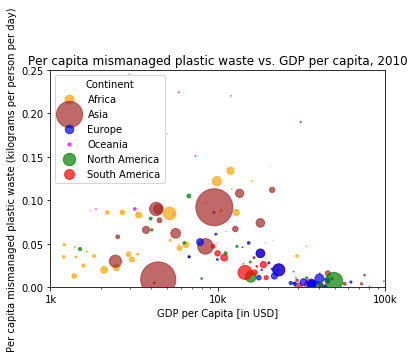

In [15]:
for cont in col:
    pop = np.array(plastic[plastic['Continent']==cont]['TotalPop'])/1000000
    plt.scatter(x='PerCapGDP', y='PerCapMisWaste', data=plastic[plastic['Continent']==cont],alpha=0.7,c=col[cont],s=pop,label=cont)

plt.xlim(1000,100000)
plt.ylim(0,0.25)
plt.xscale('log')
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Per capita mismanaged plastic waste (kilograms per person per day)')
plt.title('Per capita mismanaged plastic waste vs. GDP per capita, 2010')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])
plt.legend(loc="upper left", title="Continent")

plt.show()

From the graph above, we can see a descending trend between GDP and mismanaged plastic waste. This result suggests that the more developed a country is, it may manage plastic waste more thoroughly. Furthermore, it can be seen that countries mainly from Asia and Africa have a higher amount of mismanaged plastic waste per capita.

## Does the higher coastal population leads to that this country produces a higher amount of mismanaged plastic waste?

As for the first question, we use scatter plot to find the answer on the question. The x-axis indicates coastal population, y-axis illustrates the amount of mismanaged pastic waste in tonnes and the size of the bubble indicates the total population.. The coastal population is here based on those who live within 50km of a coastal water.

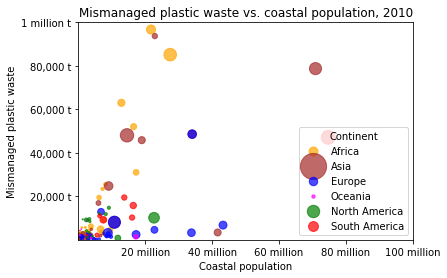

In [16]:
for cont in col:
    pop = np.array(plastic[plastic['Continent']==cont]['TotalPop'])/1000000
    plt.scatter(x='CoastPop', y='MisWaste', data=plastic[plastic['Continent']==cont],alpha=0.7,c=col[cont],s=pop,label=cont)


plt.xlim(500,100000000)
plt.ylim(0,1000000)
plt.xlabel('Coastal population')
plt.ylabel('Mismanaged plastic waste')
plt.title('Mismanaged plastic waste vs. coastal population, 2010')
plt.xticks([20000000,40000000,60000000,80000000,100000000], ['20 million', '40 million', '60 million','80 million','100 million'])
plt.yticks([200000,400000,600000,800000,1000000], ['20,000 t', '40,000 t', '60,000 t','80,000 t','1 million t'])
plt.legend(loc="lower right", title="Continent")

plt.show()

The graph suggest that the country plastic waste is more mismanages in countries where more people live in coastal area. This is also suggested by the report [Plastic waste inputs from land into the ocean](http://science.sciencemag.org/content/347/6223/768/) that concludes that populations who live in coastal area are those for which plastic waste is at risk of leading to ocean debris. Waste that is further inland is significantly less likely to end up as ocean.

## Which continent manages plastic waste the most inadequately?
We first look at this question from a perspective of pie charts to see the share of both total and mismanaged plastic waste by each continent.

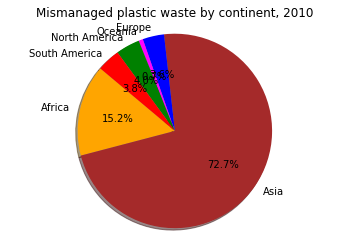

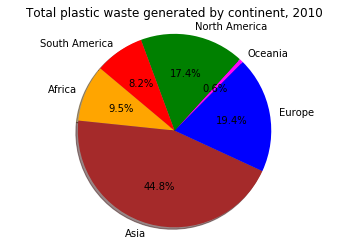

In [17]:
# Compute the total and mismanaged plastic waste for whole continent as the sum of all countries that lie within given continent
sum_cont_mis = []
sum_cont_total = []
for cont in col:
    sum_cont_mis.append(np.sum(plastic[plastic['Continent']==cont]['MisWaste']))
    sum_cont_total.append(np.sum(plastic[plastic['Continent']==cont]['PlasticWasteGen']))

# Create labels and colors
labels = []
colors = []
for cont in col:
    labels.append(cont)
    colors.append(col[cont])

# Construct first pie chart - Mismanaged plastic waste
plt.pie(sum_cont_mis, labels=labels,autopct='%1.1f%%',colors=colors, shadow=True, startangle=140)
plt.title('Mismanaged plastic waste by continent, 2010')

plt.axis('equal')
plt.show()

# Construct second pie chart - Total plastic waste generated
plt.pie(sum_cont_total, labels=labels,autopct='%1.1f%%',colors=colors, shadow=True, startangle=140)
plt.title('Total plastic waste generated by continent, 2010')

plt.axis('equal')
plt.show()

From the graphs above, it can be seen that Asia produces both mismanaged plastic waste and total plastic waste the most. Moreover, to better illustrate these results, we construct a world map that shows the share of plastic waste that is inadequately managed.

### Share of plastic waste that is inadequately managed, 2010

In [18]:
# Upload map
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_geo = f'{url}/world-countries.json'

# Setup a folium map at a high-level zoom
m = folium.Map(location=[50, 15], zoom_start=2)

# Choose data needed
data = plastic[['Country','Code', 'InadequatelyManPlastic']]

# Setup map
folium.Choropleth(
    geo_data=country_geo,
    name='Share of plastic waste that is inadequately managed',
    data=data,
    columns=['Code', 'InadequatelyManPlastic'],
    nan_fill_color='lightgrey',
    nan_fill_opacity=0.4,
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Share of plastic waste that is inadequately managed (%)'
    ).add_to(m)


folium.LayerControl().add_to(m)

# Show map
m
m.save('chloropleth_map.html')

The map above support the results that were given by pie charts. The dark blue color illustrates countries which share of mismanaged plastic waste is higher than 73 %. It can be seen that these countries lie mainly in South East Asia and Africa. Following bar chart shows 10 countries that produce the most mismanaged plastic waste.

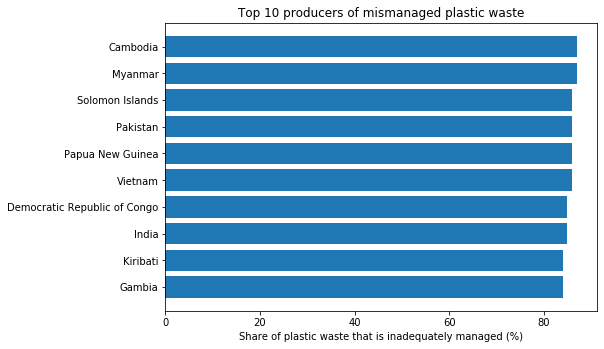

In [19]:
# Choose only countires that produces more than 75 % of waste
data_above73 = data[data['InadequatelyManPlastic']>=75]
# Sort them
data_above73.sort_values(by=['InadequatelyManPlastic'], inplace=True)
# Choose top 10
top10_data_above73 = data_above73[-11:-1]

top10_data_above73.head()

# Create bar chart
fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
ax.barh(top10_data_above73['Country'],top10_data_above73['InadequatelyManPlastic'],align='center')
ax.set_xlabel('Share of plastic waste that is inadequately managed (%)')
ax.set_title('Top 10 producers of mismanaged plastic waste')

plt.show()